In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import cov
from scipy.stats import pearsonr

In [2]:
ceph_1 = pd.read_csv("reading/ceph_1.csv", index_col = 0)
ceph_2 = pd.read_csv("reading/ceph_2.csv", index_col = 0)
ceph_1['log P'] = np.log10(ceph_1["Per"])
ceph_2['log P'] = np.log10(ceph_2["Per"])

In [3]:
calib_data = np.array([['SU Cas',0.29,-2],['SZ Tau',0.65,-3.1],['CV Mon',.73,-3.4],['QZ Nor',.74,-3.3],['V Cen',.74,-3.4],['V367 Sct',.8,-3.6],['DL Cas',.90,-3.8],['S Nor',.99,-4.0],['Zeta Gem',1.01,-4.1],['X Cyg',1.21,-4.7],['WZ Sgr',1.34,-5.1],['SW Vel',1.37,-5.1],['SV Vul',1.65,-6.1]]) 
column_names = ['Cepheid', 'log P', 'M']
calib_df = pd.DataFrame(data=calib_data, columns=column_names)

In [4]:
calib_df['log P'] = pd.to_numeric(calib_df['log P'])
calib_df['M'] = pd.to_numeric(calib_df['M'])

In [5]:
calib_df

,Cepheid,log P,M
0,SU Cas,0.29,-2.0
1,SZ Tau,0.65,-3.1
2,CV Mon,0.73,-3.4
3,QZ Nor,0.74,-3.3
4,V Cen,0.74,-3.4
5,V367 Sct,0.80,-3.6
6,DL Cas,0.90,-3.8
7,S Nor,0.99,-4.0
8,Zeta Gem,1.01,-4.1
9,X Cyg,1.21,-4.7


m = -2.9247499463822644 b = -1.1826619743024827
Pearsons correlation: -0.998391


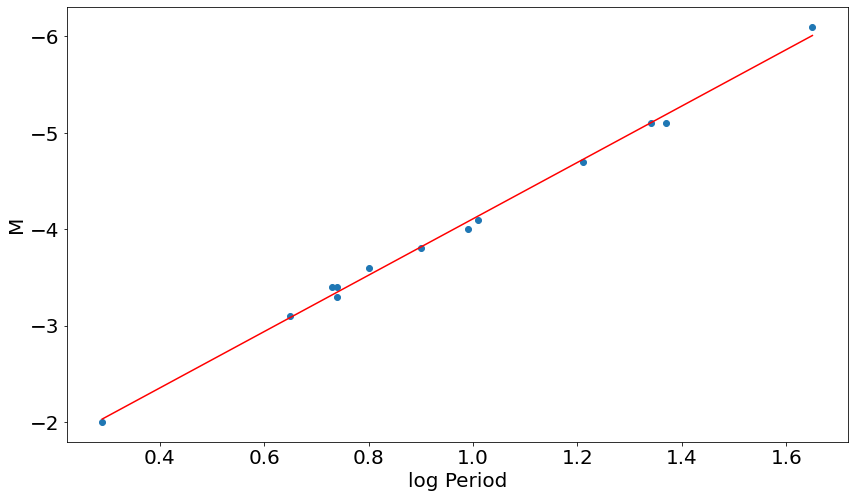

In [6]:
fig, ax = plt.subplots(1,1, figsize=(14,8))

y = calib_df["M"]
x = calib_df["log P"]

ax.set_xlabel('log Period', fontsize=20)
ax.set_ylabel('M',fontsize=20)

ax.tick_params(axis='both', which='major', labelsize=20)

plt.gca().invert_yaxis()

ax.scatter(x,y)

m, b = np.polyfit(x, y, 1)
# print(type(x[0]))
ax.plot(x, x*m+b,c='red')

print('m =',m,'b =',b)
covariance = cov(x,y)
corr, _ = pearsonr(x,y)
print('Pearsons correlation: %.6f' % corr)

In [7]:
m = -2.9247499463822644 
b = -1.1826619743024827

ceph_1['M'] = m*ceph_1['log P']+b
ceph_2['M'] = m*ceph_2['log P']+b
ceph_1['distance'] = 10**((ceph_1['Vmag'] - ceph_1['M'] + 5)/5)
ceph_2['distance'] = 10**((ceph_2['Vmag'] - ceph_2['M'] + 5)/5)

In [8]:
ceph_1

,Vmag,Per,log P,M,distance
0,25.033,12.91,1.110926,-4.431843,7.815715e+06
1,24.981,18.75,1.273001,-4.905872,9.492366e+06
2,25.567,7.85,0.894870,-3.799932,7.471132e+06
3,24.231,27.10,1.432969,-5.373739,8.335809e+06
4,23.731,29.72,1.473049,-5.490961,6.988634e+06
5,24.201,17.54,1.244030,-4.821137,6.374226e+06
6,24.163,28.58,1.456062,-5.441280,8.334048e+06
7,24.383,18.75,1.273001,-4.905872,7.207331e+06
8,24.534,27.10,1.432969,-5.373739,9.584021e+06
9,23.834,27.10,1.432969,-5.373739,6.943010e+06


In [9]:
ceph_2

,Vmag,Per,log P,M,distance
0,24.437,25.35,1.403978,-5.288946,8.814330e+06
1,25.069,15.70,1.195900,-4.680369,8.909922e+06
2,24.881,14.59,1.164055,-4.587233,7.827923e+06
3,24.794,12.11,1.083144,-4.350588,6.744000e+06
4,25.036,8.57,0.932981,-3.911398,6.158565e+06
5,24.766,9.95,0.997823,-4.101045,5.934840e+06
6,25.297,10.91,1.037825,-4.218040,7.998489e+06
7,25.090,8.67,0.938019,-3.926133,6.356626e+06
8,24.889,14.19,1.151982,-4.551922,7.730089e+06
9,25.461,7.85,0.894870,-3.799932,7.115188e+06


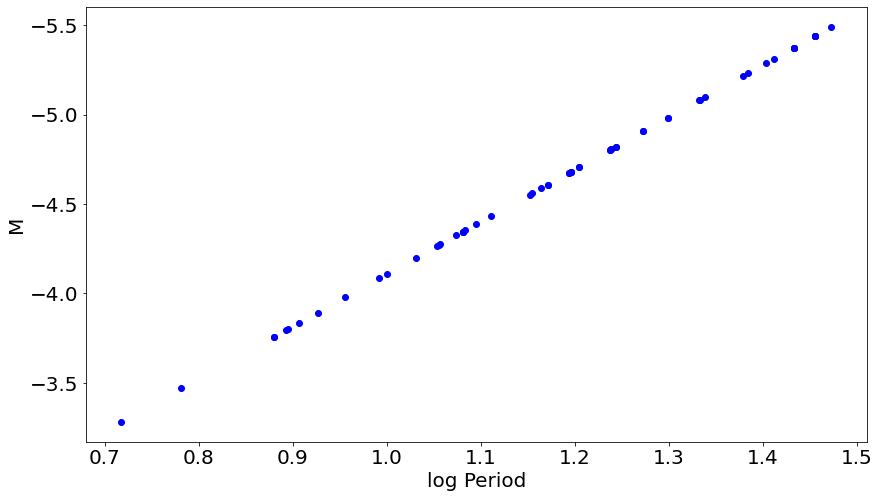

In [10]:
fig, ax = plt.subplots(1,1, figsize=(14,8))

y1 = ceph_1["M"]
x1 = ceph_1["log P"]

# y2 = ceph_2["M"]
# x2 = ceph_2["log P"]

ax.set_xlabel('log Period', fontsize=20)
ax.set_ylabel('M',fontsize=20)

ax.tick_params(axis='both', which='major', labelsize=20)

plt.gca().invert_yaxis()

ax.scatter(x1,y1, c='blue')
# ax.scatter(x2,y2, c='red')

# m1, b1 = np.polyfit(x1, y1, 1)
# # print(type(x))
# # plt.plot(x, y, 'o')
# plt.plot(x1, x1*m1+b1,c='blue')

# print('m1 =',m1,'b1 =',b1)
# covariance = cov(x1,y1)
# corr, _ = pearsonr(x1,y1)
# print('Pearsons correlation: %.6f' % corr)

# m2, b2 = np.polyfit(x2, y2, 1)
# # print(type(x))
# # plt.plot(x, y, 'o')
# plt.plot(x2, x2*m2+b2,c='red')

# print('m2 =',m2,'b2 =',b2)
# covariance = cov(x2,y2)
# corr, _ = pearsonr(x2,y2)
# print('Pearsons correlation: %.6f' % corr)

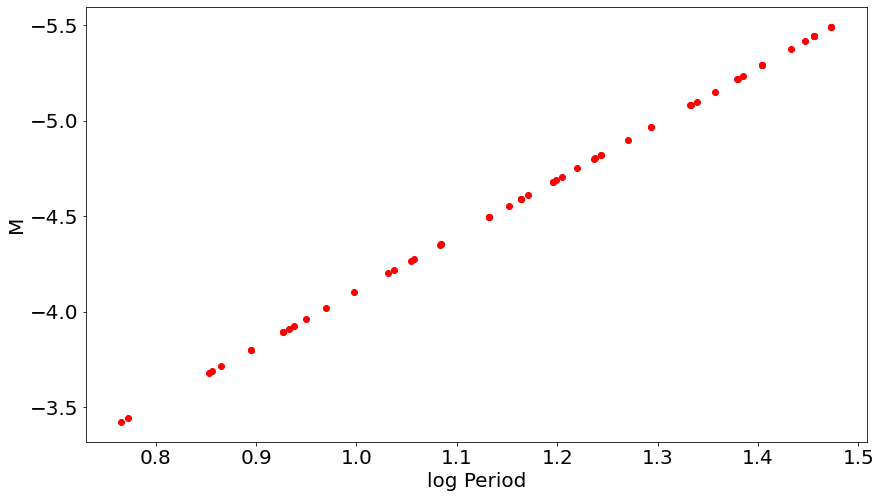

In [11]:
fig, ax = plt.subplots(1,1, figsize=(14,8))

y2 = ceph_2["M"]
x2 = ceph_2["log P"]

ax.set_xlabel('log Period', fontsize=20)
ax.set_ylabel('M',fontsize=20)

ax.tick_params(axis='both', which='major', labelsize=20)

plt.gca().invert_yaxis()

ax.scatter(x2,y2, c='red')

# m2, b2 = np.polyfit(x2, y2, 1)
# # print(type(x))
# # plt.plot(x, y, 'o')
# plt.plot(x2, x2*m2+b2,c='red')

# print('m2 =',m2,'b2 =',b2)
# covariance = cov(x2,y2)
# corr, _ = pearsonr(x2,y2)
# print('Pearsons correlation: %.6f' % corr)